In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image


In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0      # we mormalise between 0 to 1

In [5]:
# convolutional layer

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [6]:
# Fully Connected layer

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [7]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [10]:
# Reshaping to format which CNN expects (batch, height, width, channels) - reshape in 4D array

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

In [13]:
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0885 - accuracy: 0.9728
Epoch 2/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0665 - accuracy: 0.9794
Epoch 3/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0532 - accuracy: 0.9836
Epoch 4/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0439 - accuracy: 0.9863
Epoch 5/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0367 - accuracy: 0.9886
Epoch 6/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 7/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0277 - accuracy: 0.9910
Epoch 8/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0227 - accuracy: 0.9928
Epoch 9/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 10/10
60000/60000 [==============================

In [14]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 3s 309us/step


[0.05023971324311133, 0.988099992275238]

In [ ]:
# INference

In [24]:
test_image = X_test[201]

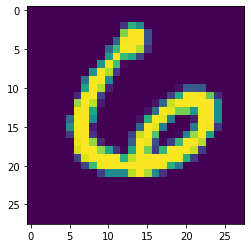

In [25]:
plt.imshow(test_image.reshape(28,28))

In [26]:
test_image = image.img_to_array(test_image)

In [27]:
# predict expect a batch of images....we add a dummy dimension
test_image = test_image.reshape(1,28,28,1)   # here 1 is no of the image in array, 28,28 is the image of the size, 
                                                 # and 1 is channel ( 1 is for grey and 3 is for RGB)

In [28]:
result = model.predict(test_image)

In [29]:
result

array([[2.5746722e-08, 2.9672968e-13, 8.4083673e-14, 1.9870463e-15,
        1.3327164e-09, 5.4509350e-08, 1.0000000e+00, 4.8656258e-15,
        1.3736155e-10, 8.1671903e-10]], dtype=float32)

In [30]:
np.around(result)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [31]:
(np.around(result)).argmax()

6